# 98722522_Einollahi_mohammad-reza

## Importing requierd libraries and define variable to store pathes of images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import os
%matplotlib inline

pathes = ["./images/map.jpg", "./images/tsukuba_l.png", "./images/Unequalized_Hawkes_Bay.jpg"]

map_img = cv2.imread("./images/map.jpg", 0)
tsukuba = cv2.imread("./images/tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
une_Hawkes_Bay = cv2.imread("./images/Unequalized_Hawkes_Bay.jpg", cv2.IMREAD_GRAYSCALE)

<br />

# 2.الف
### By using <code>img.flatten()</code>, image turns into 1D array.
###  numpy.hist() : 
#### it returns (hist, bins)  , hist is array with 256 elements inside it and each element $k$ shows the $n_k$ and bins is the width that we want for our histogram so it must be give **0** as a value.

In [2]:
def img_hist_plotter(path):
    img = cv2.imread(path, 0)

    fig, ax = plt.subplots(1,2, figsize=(14,8))

    ax[0].imshow(img, 'gray', vmin=0, vmax=255)
    ax[0].title.set_text("original_image")
    ax[0].set_yticklabels([])
    ax[0].set_xticklabels([])

    ax[1].hist(img.flatten(), bins=256, range=[0,256])
    ax[1].title.set_text("histogram")
    plt.show()
    fig.savefig("2_A_histogram_" + os.path.basename(path))


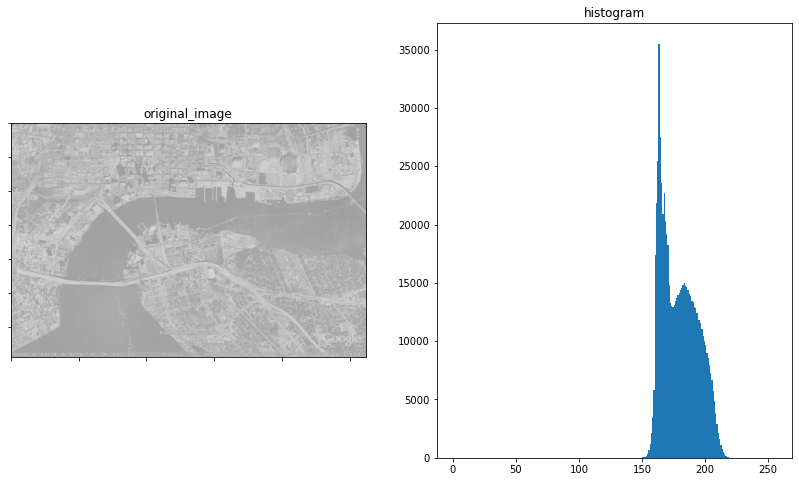

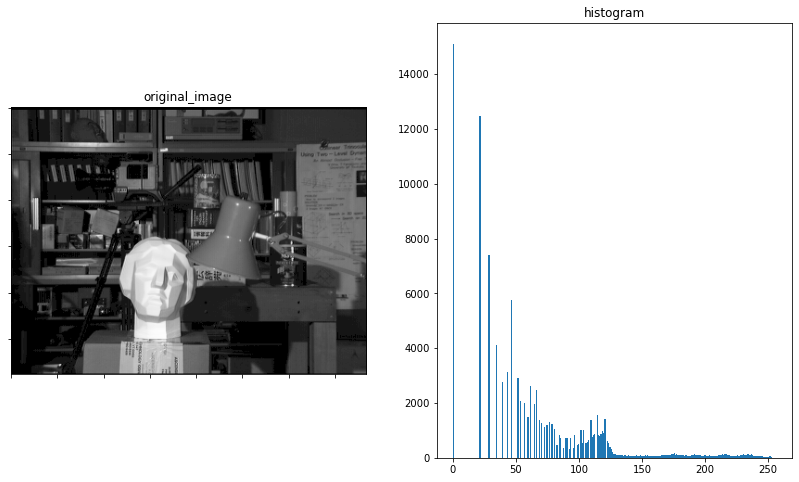

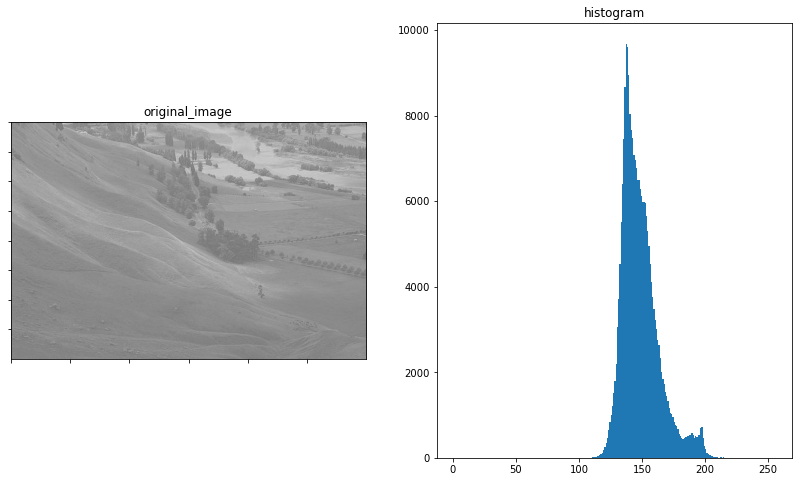

In [3]:
for path in pathes:
    img_hist_plotter(path)

<br />

# 2.ب Histogram Stretch
<br />

## For stretching histogram we must follow the bellow formula:

$$Stretch =  \frac{f_{x,y} - f_{min}}{f_{max} - f_{min}} {(MAX - MIN)}$$

### img.min() returns minimum value in the image
### img.max() returns minimum value in the image


In [4]:
# Stretched Function
def stretch_histogram(img, MAX=255, MIN=0):
    hist, bins = np.histogram(img.flatten(), 256, [0,256])
    fmax, fmin = img.max(), img.min()
    stretched_img = ((img - fmin) / (fmax - fmin)) * (MAX - MIN)
    
    return stretched_img

In [5]:
def stretch_plotter(path):
    img = cv2.imread(path, 0)
    stretched_img = stretch_histogram(img)
    
    fig, ax = plt.subplots(1,2, figsize=(14,8))

    ax[0].imshow(img, 'gray', vmin=0, vmax=255)
    ax[0].set_title("original_image")
    ax[0].set_xticklabels([])
    ax[0].set_yticklabels([])

    ax[1].imshow(stretched_img, 'gray', vmin=0, vmax=255)
    ax[1].set_title("stretched_image")
    ax[1].set_xticklabels([])
    ax[1].set_yticklabels([])

    plt.show()
    fig.savefig("2_B_stretch_histogram_" + os.path.basename(path))

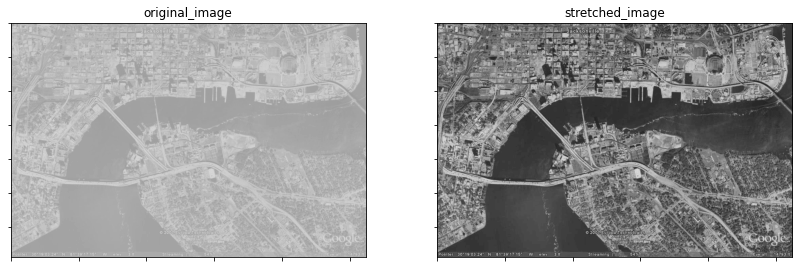

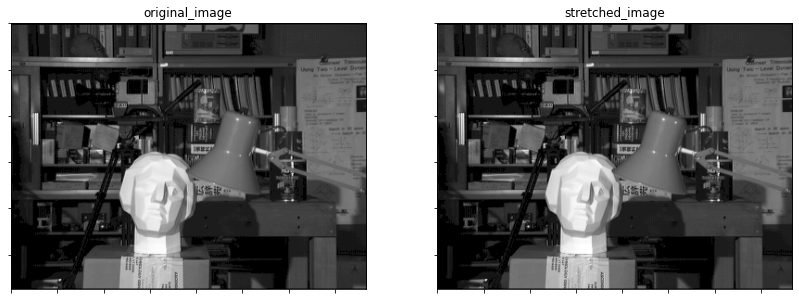

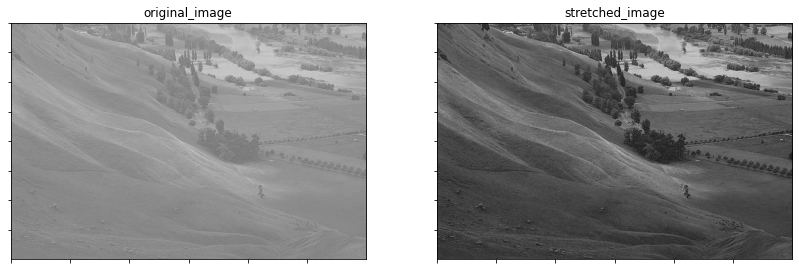

In [6]:
for path in pathes:
    stretch_plotter(path)

<br />

# 2.پ Histogram Clip

## To find $f_{min}$ and $f_{max}$ we can follow this algorithm:
(this example is for percentile 0.01)
1. Sort the img.Flatten()
2. find $f_{min}$ by $f_{1} = img.flatten()[sort(img.flatten())[np.floor(percentile \times len(img.flatten()))]]$
3. find $f_{max}$ by $f_{99} = img.flatten()[sort(img.flatten())[ np.floor((1 - percentile) \times len(img.flatten()))]]$

### numpy.clip(a , $f_{min}$, $f_{max}$ ):
#### It replace element lower than $f_{min}$ by $f_{min}$ and higher than $f_{max}$ by $f_{max}$
e.g. 
<python>np.clip(np.arange(6), 2, 4)</python>
<code>[2,2,2,3,4,4] </code>

### note: If we don't clip the original image some negative value would be shown up

In [6]:
# Clip function
def clip_histogram(path, percentile=0.01, plot=False, MAX=255, MIN=0):
    img = cv2.imread(path, 0)

    hist, bins = np.histogram(img.flatten(), 256, [0,256])

    clipped_img = np.zeros(img.shape)

    img_sort = np.sort(img.flatten())

    fmin = img_sort[round(percentile * len(img_sort))]
    fmax = img_sort[round((1 - percentile) * len(img_sort))]

    cliped_img = np.clip(img , fmin, fmax)
    cliped_img = ((cliped_img - fmin) / (fmax - fmin)) * (MAX - MIN)

    fig, ax = plt.subplots(1,2, figsize=(14,8))
    
    ax[0].imshow(img, 'gray', vmin=0, vmax=255)
    ax[0].set_title("original_image")
    ax[0].set_xticklabels([])
    ax[0].set_yticklabels([])

    ax[1].imshow(cliped_img, 'gray', vmin=0, vmax=255)
    ax[1].set_title("clipped_image")
    ax[1].set_xticklabels([])
    ax[1].set_yticklabels([])

    plt.show()
    if plot == True:
        fig.savefig("2_C_Cliped_stretch_histogram_" + os.path.basename(path))

### test_1_Clipping using percentile = 0.01

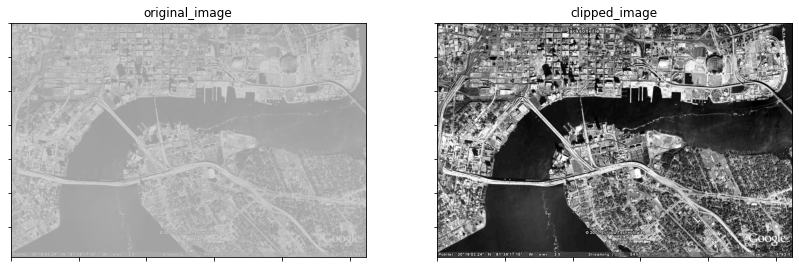

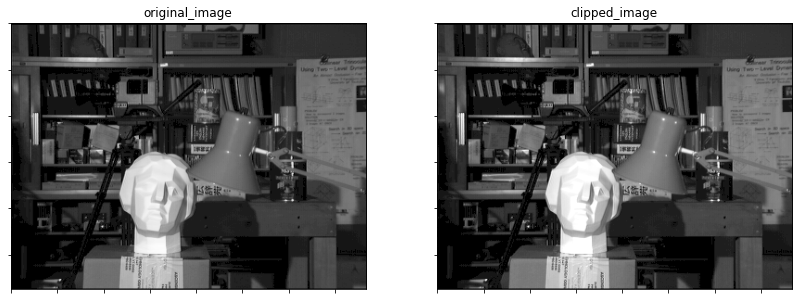

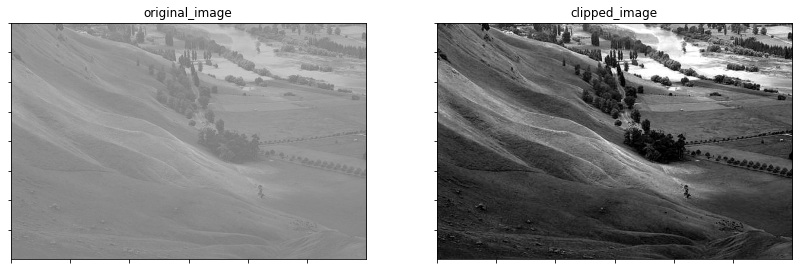

In [7]:
for path in pathes:
    clip_histogram(path, 0.01, True)

### test_2_Clipping by using percentile = 0.2

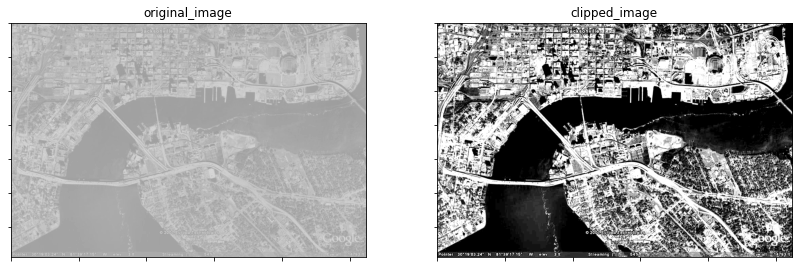

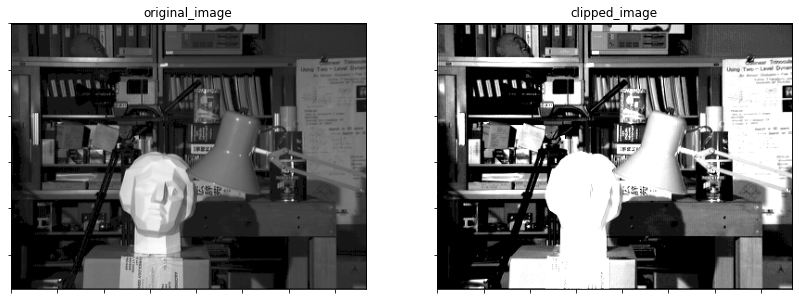

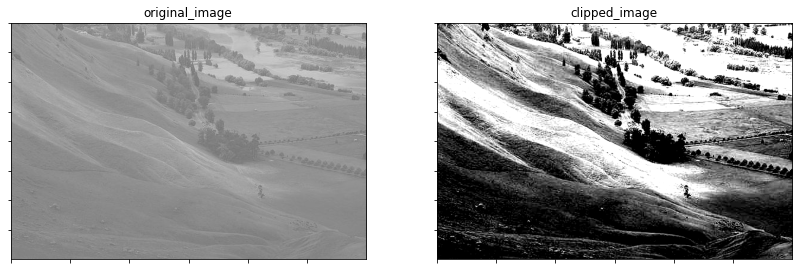

In [8]:
for path in pathes:
    clip_histogram(path, percentile=0.2)

# 2.ت Histogram Equalization

### np.cumsum():
#### It generates an array ,that every element valued by CDF: $\sum{n_i}$ 

## Transform function:
### In here we use array "he_img" as a transform function and it is as bellow:
he_img[current_gray_level (0 to 255)] = new_gray_level

In [9]:
def histogram_equalization(img):

    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()

    equalized_hist = np.round((255 * cdf) / cdf.max())

    he_img = np.zeros(img.shape)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            he_img[i,j] = equalized_hist[img[i,j]]
    return he_img, equalized_hist

def he_plotter(path):
    img = cv2.imread(path, 0)
    he_img, equalized_hist = histogram_equalization(img)
    
    fig, ax = plt.subplots(1,3, figsize=(14,8))

    ax[0].imshow(img, 'gray', vmin=0, vmax=255)
    ax[0].set_title("original_image")
    ax[0].set_xticklabels([])
    ax[0].set_yticklabels([])

    ax[1].imshow(he_img, 'gray', vmin=0, vmax=255)
    ax[1].set_title("Histogram Equalization")
    ax[1].set_xticklabels([])
    ax[1].set_yticklabels([])
    
    ax[2].plot(equalized_hist)
    ax[2].set_title("transform_function")

    plt.show()

    fig.savefig("2_D_histogram_equalization_" + os.path.basename(path))

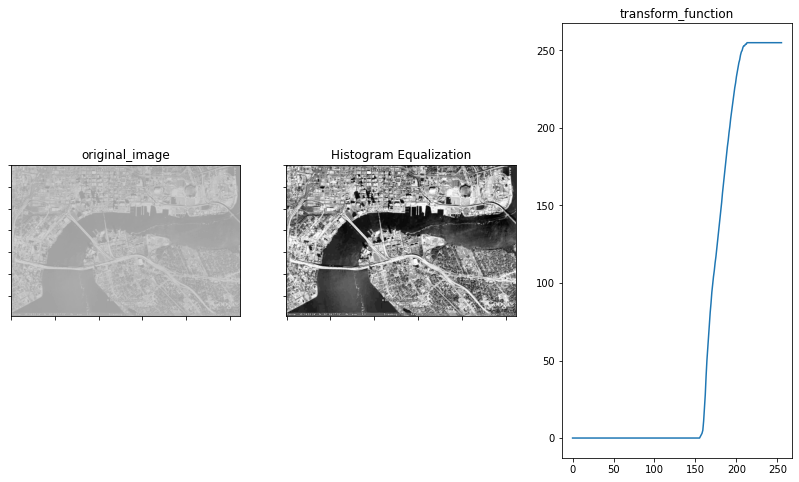

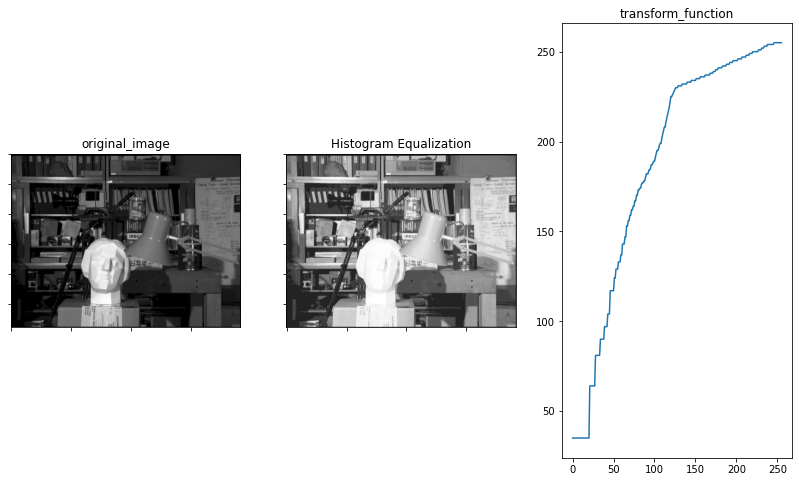

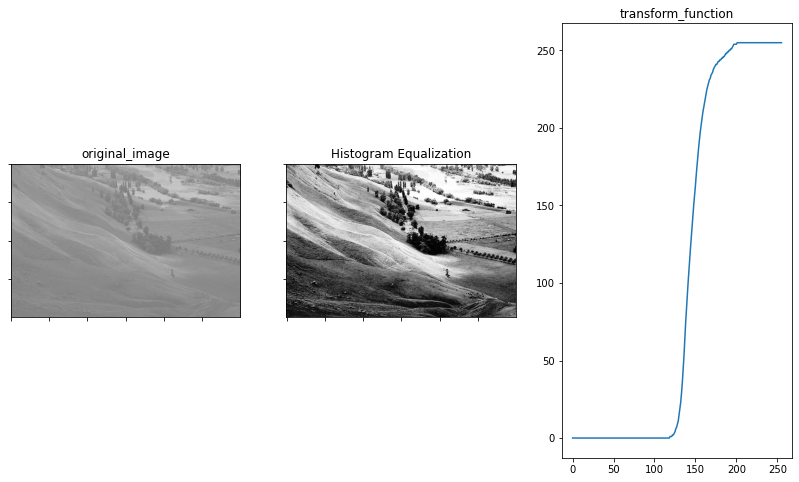

In [10]:
for path in pathes:
    he_plotter(path)

<br /><br /><br />
# Question Number 3
## CLAHE using openCV libraries

### We must use cv2.createCLAHE(clipLimit , tileGridSize, ...)

## clip-limit <small> is the contrast limit for localized changes in contrast. 
<br />

## tileGridSize <small> is for image segementing.

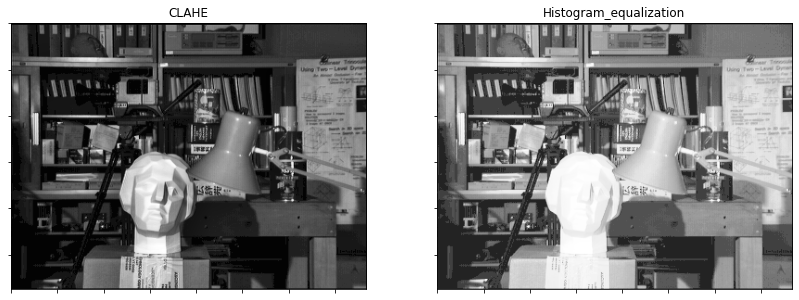

In [11]:
tsukuba = cv2.imread("./images/tsukuba_l.png", cv2.IMREAD_GRAYSCALE)

clahe = cv2.createCLAHE(clipLimit = 2, tileGridSize = (8, 8)) 
clahe_img = clahe.apply(tsukuba)
he_img = histogram_equalization(tsukuba)[0]

fig_clahe, axes = plt.subplots(1,2,figsize=(14,8))

axes[0].imshow(clahe_img, 'gray', vmin=0, vmax=255)
axes[0].set_title("CLAHE")
axes[0].set_yticklabels([])
axes[0].set_xticklabels([])

axes[1].imshow(he_img, 'gray', vmin=0, vmax=255)
axes[1].set_title("Histogram_equalization")
axes[1].set_yticklabels([])
axes[1].set_xticklabels([])

plt.show()
fig_clahe.savefig("3_CLAHE_tsukuba.jpg")

<br /> 

# Question 4

## a = np.abs(np.arange(size) - np.floor(size/2)) <small> we defind distance from center based on axis.

### np.meshgrid(x,y) creates  an 2 array by shape(x.shape, y.shape) in the first array it put x value in each row and in second array it puts y value in each column.
#### So by adding this two array we can obtain distance from center.

In [12]:
def make_gaussian(size=3, std=1):
    # Your code here
    kernel = np.zeros((size, size))
    a = np.abs(np.arange(size) - np.floor(size/2))
    r2 = np.meshgrid(a,a)[0] + np.meshgrid(a,a)[1]
    kernel = np.exp(-r2 / (2*std**2))
    
    kernel = kernel / kernel.sum()
    
    return kernel

#### <code>output[y, x] = (kernel * image_padded[y: y + kernel_height, x: x + kernel_width]).sum()</code> is obvious .
#### it convolves filters on image.


In [13]:
def convolve2d(image, kernel):
    # You do not need to modify these, but feel free to implement your own
    kernel       = np.flipud(np.fliplr(kernel))  # Flip the kernel, if it's symmetric it does not matter
    kernel_width = kernel.shape[0]
    kernel_height= kernel.shape[1]
    padding      = (kernel_width - 1)
    offset       = padding // 2
    output       = np.zeros_like(image)
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + padding, image.shape[1] + padding))   
    image_padded[offset:-offset, offset:-offset] = image

    # implement the convolution inside the inner for loop
    for y in range(image.shape[0]): # "y" in here is demonstratinging "rows"
        for x in range(image.shape[1]): # "x" in here is demonstrating "clomuns"
            
            output[y, x] = (kernel * image_padded[y: y + kernel_height, x: x + kernel_width]).sum()
            continue
    return output

<ipython-input-15-2a3cc432f958>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


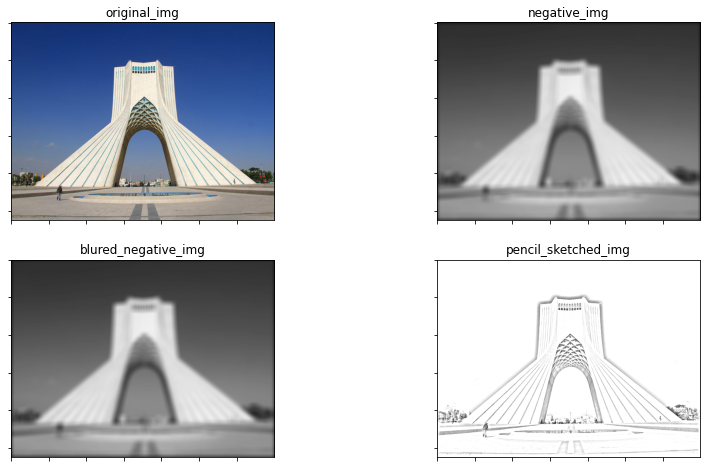

In [15]:
azadi = plt.imread("Azadi.jpg")
azadi_gray = cv2.imread("Azadi.jpg", 0)
azadi_neg = 255 - azadi_gray
kernel = make_gaussian(size=19, std=3)
blur = convolve2d(azadi_gray, kernel)
pencil_sketch = cv2.divide(azadi_gray, blur, scale=256)

fig ,ax = plt.subplots(2,2, figsize=(14,8))

ax[0,0].imshow(azadi, 'gray', vmin=0, vmax=255)
ax[0,0].set_title('original_img')
ax[0,0].set_xticklabels([])
ax[0,0].set_yticklabels([])

ax[0,1].imshow(blur, 'gray', vmin=0, vmax=255)
ax[0,1].set_title('negative_img')
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])

ax[1,0].imshow(blur, 'gray', vmin=0, vmax=255)
ax[1,0].set_title('blured_negative_img')
ax[1,0].set_xticklabels([])
ax[1,0].set_yticklabels([])

ax[1,1].imshow(pencil_sketch, 'gray', vmin=0, vmax=255)
ax[1,1].set_title('pencil_sketched_img')
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

fig.show()
fig.savefig("4_azadi_pencil_sketch.jpg")